In [1]:
import numpy as np
import pandas as pd
import pydream as pdr


import os
import scipy.linalg
from pydream.parameters import FlatParam
from pydream.core import run_dream
from pydream.convergence import  Gelman_Rubin
import time

In [2]:
time.time()

1586312454.8266172

/home/afengler/miniconda3/envs/pytorch/lib/python3.7/site-packages/pydream/Dream.py:332: RuntimeWarning: invalid value encountered in double_scalars
  q_new = metrop_select(np.nan_to_num(total_proposed_logp - total_old_logp), q, q0)


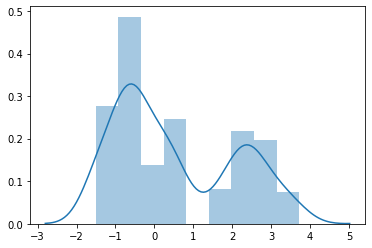

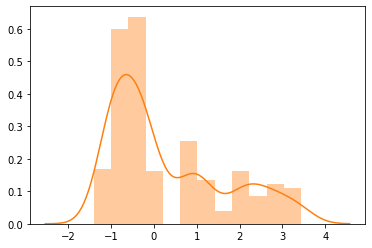

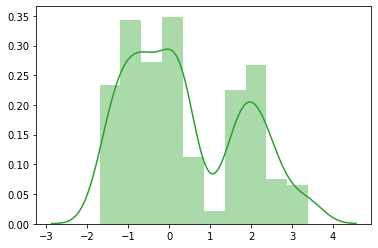

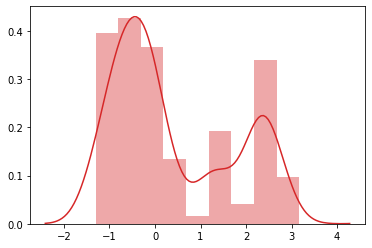

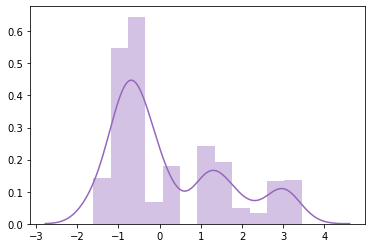

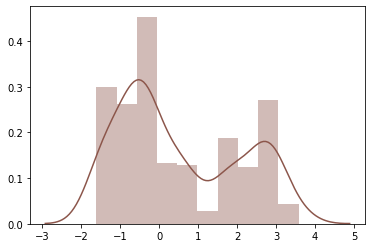

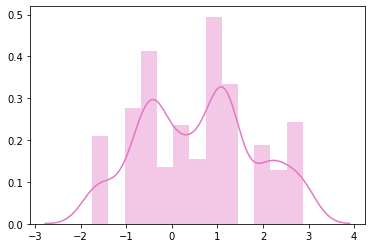

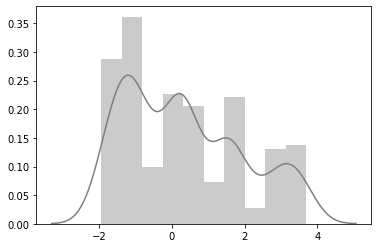

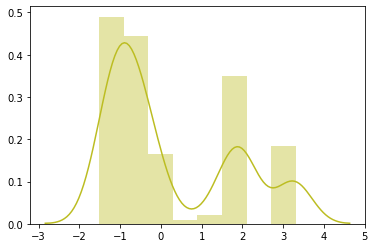

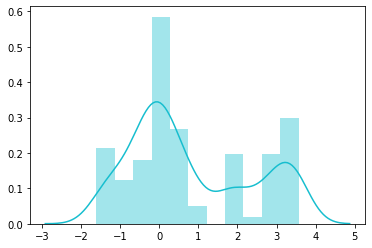

In [3]:
log_F = np.array([-10.2880, -9.5949])

F = [1/2, 1/2]

d = 10
k = 2

log_prior = np.log(np.array([.3333, .6666]))

mu1 = np.linspace(-0.5, -0.5, num = d)
mu2 = np.linspace(2.5, 2.5, num = d)
mu = np.array([mu1, mu2])
C = np.identity(d)
L = scipy.linalg.cholesky(C, lower = False)
diagL = np.diag(L)
logDetSigma = 2 * np.sum(np.log(diagL))
cov = np.identity(10)
mean = np.linspace(- 0.5, 2.5, num = 10)

#Create initial samples matrix m that will be loaded in as DREAM history file
m = np.random.multivariate_normal(mean, cov, size = 100)

np.save('mixturemodel_seed.npy', m)

def likelihood(params):
    log_lh = np.zeros((k))
    
    if np.sum(params > 4)  > 0:
        return -np.inf
    if np.sum(params < -2) > 0:
        return -np.inf
    for j in range(2):
        log_lh[j] = np.exp(-1.0 * np.sum((params - mu[j,:])**2) + F[j])  #+ log_F[j])
    #print(np.sum(log_lh))
    #np.sum(log_lh)
    return np.log(np.sum(log_lh))
#     maxll = np.max(log_lh)
#     post = np.array(np.exp(log_lh - maxll), dtype = 'float64')
#     density = np.sum(post)
#     post = post / float(density)
#     log_L = np.log(density) + maxll
#     #print(log_L)
#     return log_L
    #return np.sum(log_lh)
    
    # All this computation seems useless (it is for numerical stability ... ) since we can simply stay in log space
    
    
    #print 'params: ',params,'log_L: ',log_L,'log_lh: ',log_lh,'maxll: ',maxll,'post: ',post,'density: ',density
    #print(time.time() - s_t)
    #return log_L
    
params = FlatParam(test_value = mean)
 
starts = [m[chain] for chain in range(3)]

if __name__ == '__main__':

    niterations = 500
    # Run DREAM sampling.  Documentation of DREAM options is in Dream.py.
    converged = False
    total_iterations = niterations
    nchains = 10

    sampled_params, log_ps = run_dream([params], 
                                       likelihood,
                                       niterations = niterations,
                                       nchains = nchains, 
                                       start = starts, 
                                       start_random = True, 
                                       save_history = True, 
                                       verbose = False,
                                       nverbose = 50, 
                                       history_file = 'mixturemodel_seed.npy', 
                                       multitry = False, parallel = True)
    
    for chain in range(len(sampled_params)):
        np.save('mixmod_mtdreamzs_3chain_sampled_params_chain_' + str(chain) + '_' + str(total_iterations), sampled_params[chain])
        np.save('mixmod_mtdreamzs_3chain_logps_chain_' + str(chain) + '_' + str(total_iterations), log_ps[chain])

    os.remove('mixturemodel_seed.npy')

    try:
        #Plot output
        import seaborn as sns
        from matplotlib import pyplot as plt
        total_iterations = len(sampled_params[0])
        burnin = int(total_iterations / 2)
        samples = np.concatenate((sampled_params[0][burnin:, :], sampled_params[1][burnin:, :], sampled_params[2][burnin:, :]))

        ndims = len(sampled_params[0][0])
        colors = sns.color_palette(n_colors=ndims)
        for dim in range(ndims):
            fig = plt.figure()
            sns.distplot(samples[:, dim], color=colors[dim])
            fig.savefig('PyDREAM_example_MixtureModel_dimension_' + str(dim))

    except ImportError:
        pass

else:
    run_kwargs = {'parameters':params, 'likelihood':likelihood, 'niterations':50000, 'nchains':3, 'start':starts, 'start_random':False,\
                  'multitry':5, 'adapt_gamma':True, 'history_thin':1, 'model_name':'corm_dreamzs_5chain', 'verbose':True, \
                  'save_history':True, 'history_file':'mixturemodel_seed.npy', 'parallel':False}

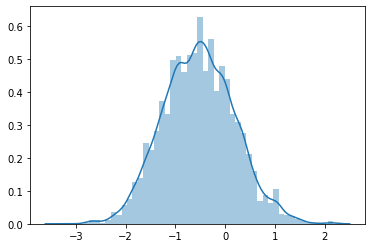

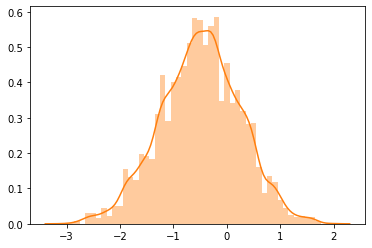

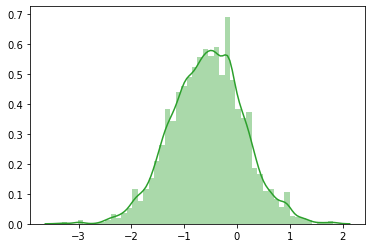

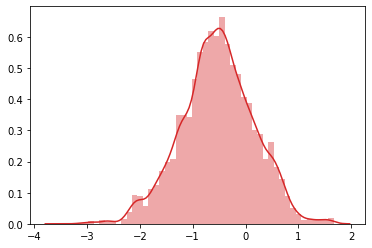

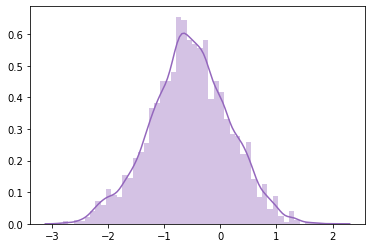

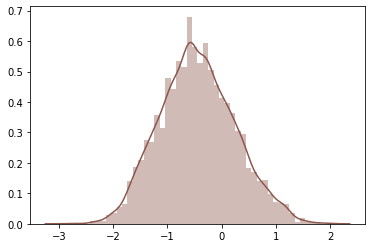

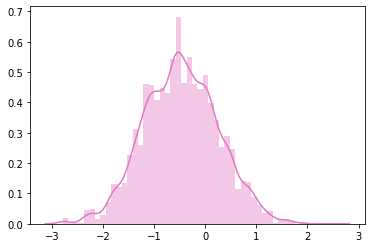

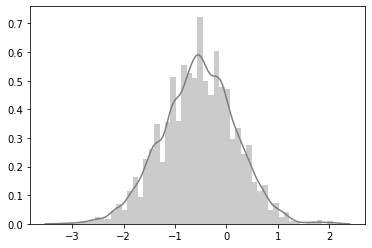

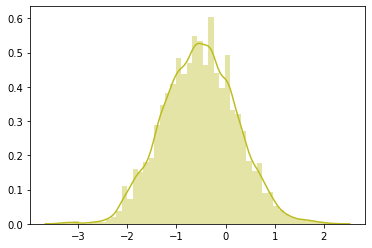

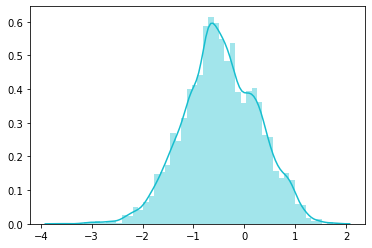

In [41]:
log_F = np.array([-10.2880, -9.5949])

F = [1/2, 1/2]

d = 10
k = 2

log_prior = np.log(np.array([.3333, .6666]))

mu1 = np.linspace(-0.5, -0.5, num = d)
mu2 = np.linspace(2.5, 2.5, num = d)
mu = np.array([mu1, mu2])
C = np.identity(d)
L = scipy.linalg.cholesky(C, lower = False)
diagL = np.diag(L)
logDetSigma = 2 * np.sum(np.log(diagL))
cov = np.identity(10)
mean = np.linspace(- 0.5, 2.5, num = 10)

#Create initial samples matrix m that will be loaded in as DREAM history file
m = np.random.multivariate_normal(mean, cov, size = 100)

np.save('mixturemodel_seed.npy', m)

def likelihood(params):
    log_lh = [[],[]]
    
    # evaluation of a mixture
    for j in range(2):
        log_lh[j] = np.exp(-1.0 * np.sum((params - mu[j,:])**2) + F[j])  #+ log_F[j])
    return np.log(np.sum(log_lh))
    
# Still have to understand what this is about... (this parameter class is a little elusive)
params = FlatParam(test_value = mean)

# Initialize starting points
starts = [m[chain] for chain in range(3)]

if __name__ == '__main__':

    niterations = 10000
    # Run DREAM sampling.  Documentation of DREAM options is in Dream.py.
    converged = False
    total_iterations = niterations
    nchains = 10

    sampled_params, log_ps = run_dream([params], 
                                       likelihood,
                                       niterations = niterations,
                                       nchains = nchains, 
                                       start = starts, 
                                       start_random = True, 
                                       save_history = True, 
                                       verbose = False,
                                       nverbose = 50, 
                                       history_file = 'mixturemodel_seed.npy', 
                                       multitry = False, 
                                       parallel = True)
    
    for chain in range(len(sampled_params)):
        np.save('mixmod_mtdreamzs_3chain_sampled_params_chain_' + str(chain) + '_' + str(total_iterations), sampled_params[chain])
        np.save('mixmod_mtdreamzs_3chain_logps_chain_' + str(chain) + '_' + str(total_iterations), log_ps[chain])

    os.remove('mixturemodel_seed.npy')

    try:
        #Plot output
        import seaborn as sns
        from matplotlib import pyplot as plt
        total_iterations = len(sampled_params[0])
        burnin = int(total_iterations / 2)
        samples = np.concatenate((sampled_params[0][burnin:, :], sampled_params[1][burnin:, :], sampled_params[2][burnin:, :]))

        ndims = len(sampled_params[0][0])
        colors = sns.color_palette(n_colors=ndims)
        for dim in range(ndims):
            fig = plt.figure()
            sns.distplot(samples[:, dim], color=colors[dim])
            fig.savefig('PyDREAM_example_MixtureModel_dimension_' + str(dim))

    except ImportError:
        pass

else:
    run_kwargs = {'parameters':params, 'likelihood':likelihood, 'niterations':50000, 'nchains':3, 'start':starts, 'start_random':False,\
                  'multitry':5, 'adapt_gamma':True, 'history_thin':1, 'model_name':'corm_dreamzs_5chain', 'verbose':True, \
                  'save_history':True, 'history_file':'mixturemodel_seed.npy', 'parallel':False}

In [24]:
mu[0,:]

array([-5., -5., -5., -5., -5., -5., -5., -5., -5., -5.])

In [40]:
a = [1, 2]
np.sum(a)

3

In [43]:
params = FlatParam(test_value = mean)
params.

In [50]:
params

AttributeError: 'FlatParam' object has no attribute 'dist'

In [51]:
a = np.array([0, 1, 0])

In [54]:
a > np.array([0, 0, 2])

array([False,  True, False])

In [57]:
params[0] # [params[0]]

TypeError: 'FlatParam' object is not subscriptable